# Lecture 2: Building Neural Networks with Pytorch

In last lecture, we have studied how to define a tensor, a function and how to take derivative of a function.
However, building and training neural networks directly user-defined functions would be very cumbersome. Luckily,
Pytorch provides built-in functionality which makes it much easier to build and train neural networks. In this section, we will describe how to use this functionality to build (i.e. define) a network. This lecture includes:


1. Build a logistic model
2. Build a simple deep neural network
3. Load a dataset
4. Define a training algorithm
5. Test a the accuracy of a trained model

The most important library for building neural networks is the torch.nn library. This library allows us to build neural networks by concatenating different types of layers.

# 1. Build a logistic model

In [28]:
import torch.nn as nn

# The class defining our network should inherit from nn.Module.
# This model simply takes an input of dimension 784 and multiplies it
# by a 784x10 matrix of parameters.
class LogisticRegression(nn.Module): 
    def __init__(self):
        super(LogisticRegression, self).__init__() 
        self.apply = nn.Sequential(nn.Linear(28 * 28, 10))
    def forward(self, x):
        x = x.view(-1,28*28)
        x = self.apply(x) 
        return x
# Construct an instance of the model.
model = LogisticRegression()

# 2. Build a simple deep neural network

In [30]:
import torch.nn as nn
# The class defining our network should inherit from nn.Module.
class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
# Here we define the layers of the network.
# The nn.Sequential method constructs a model by concatenating the layers which are input to it.
        self.apply = nn.Sequential(nn.Linear(20,20), 
        nn.ReLU(), 
        nn.Linear(20,20), 
        nn.ReLU()) 
# Sequentially apply a
# Linear function Rˆ20 -> Rˆ20 
# Pointwise ReLU
# Linear function Rˆ20 -> Rˆ20 
# Pointwise ReLU
                                   
# The following method must be overloaded. It specifies how to evaluate the model given an input x.
    def forward(self, x):
        x = x.view(-1,28*28)
        return self.apply(x) 
model = Net()
print(model)

Net(
  (apply): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
  )
)


# Exercise 1: Define a deep neural network containing two layers and a logistic regression, each of the two layers is consist of a linear funtion following with a ReLU function. Given a tensor $x\in R^{3*3}$ as input, print the output of the neural network $y\in R^2$. For example, we have 
# $$x=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$$

# Note that: the initial weights in the neural network are random.

# 3. Load a dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. (see more on http://yann.lecun.com/exdb/mnist/).

In the following, we show how to load the MNIST dataset by using Pytorch

tensor([7])


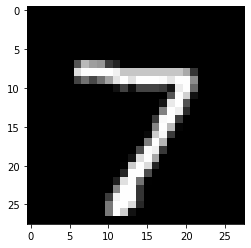

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt
import numpy as np

# Transforms images from [0,255] to [0,1] range.
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0], std=[1])])

# Load the set of training images.
trainset = torchvision.datasets.MNIST(root='./data', train= True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2 )

# Load the set of test images.
testset = torchvision.datasets.MNIST(root='./data', train= False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2) 

# Let’s plot some of the images to see what we’re dealing with.
def plot_images(imgs):
    for i in range(imgs.size()[0]):
            npimg = imgs.numpy()[i,0,:,:] 
            plt.imshow(npimg, cmap='gray') 
            plt.ion()
            plt.show()
            plt.pause(.05)

data = iter(testloader) 
images, labels = data.next() 
print(labels) 
plot_images(images)

# 4. Define a training algorithm

In [46]:
# This library contains implementations of a number of useful optimization algorithms.
import torch.optim as optim

input_size = 28*28
num_classes = 10
# As an example, we consider Logistic Regression model defined above.
model =nn.Linear(input_size, num_classes)

# The cross entropy loss is already implemented in Pytorch.
criterion = nn.CrossEntropyLoss()

# The stochastic gradient descent algorithm with a step size of 0.1.
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Write a loop to train the model using the given optimizer and loss functions.
num_epochs = 2
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 10000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, len(trainloader), loss.item()))

Epoch [1/2], Step [10000/60000], Loss: 6.2340
Epoch [1/2], Step [20000/60000], Loss: 0.0003
Epoch [1/2], Step [30000/60000], Loss: 0.0000
Epoch [1/2], Step [40000/60000], Loss: 0.0010
Epoch [1/2], Step [50000/60000], Loss: 0.0000
Epoch [1/2], Step [60000/60000], Loss: 0.0003
Epoch [2/2], Step [10000/60000], Loss: 0.0000
Epoch [2/2], Step [20000/60000], Loss: 0.0231
Epoch [2/2], Step [30000/60000], Loss: 0.0000
Epoch [2/2], Step [40000/60000], Loss: 20.3300
Epoch [2/2], Step [50000/60000], Loss: 0.0001
Epoch [2/2], Step [60000/60000], Loss: 0.0000


# 5. Test a the accuracy of a trained model

In [51]:
# Calculate the total number of test samples and the number of correctly
# classified test samples
correct = 0
total = 0
for data in testloader:
    images , labels = data
    images = images.reshape(-1, 28*28)
    outputs = model(images)
# Take the most likely label as the predicted label. 
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Out of %d samples, the model correctly classified %d, the test accuracy %f' % (total, correct, float(correct)/total))

Out of 10000 samples, the model correctly classified 8967, the test accuracy 0.896700


# Execrise 2: Traning the MNIST with the logisitc regression model to achieve at least 92% test accuracy
# Hint: you may need to tune the hyper-parameters: learning rate and epoch number

# Execrise 3: Traning the MNIST with a deep neural network to achieve at least 95% test accuracy